In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df1 = pd.read_csv('Data01.csv')
print(df1.shape)
df1.head()

(15000, 7)


,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [4]:
df1['날짜'] #Series(순열)형태로 불러옴

0        2019-05-16
1        2019-05-16
2        2019-05-16
3        2019-05-16
4        2019-05-16
            ...    
14995    2019-08-07
14996    2019-08-07
14997    2019-08-07
14998    2019-08-07
14999    2019-08-07
Name: 날짜, Length: 15000, dtype: object

In [5]:
df1['날짜_datetime'] = pd.to_datetime(df1['날짜']) #문자(object)에서 날짜(datetime) 형태로 변경

In [6]:
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16


In [7]:
df1['연도'] = df1['날짜_datetime'].dt.year #dt = datetime

In [8]:
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019


In [9]:
pd.pivot_table(data=df1, index='연도', values='출고수량', aggfunc='sum')

,출고수량
연도,
2019,108078


In [10]:
df1['월'] = df1['날짜_datetime'].dt.month
df1['주차'] = df1['날짜_datetime'].dt.isocalendar().week
df1['일자'] = df1['날짜_datetime'].dt.day
df1['요일'] = df1['날짜_datetime'].dt.day_name()

In [11]:
df1.head(2)

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도,월,주차,일자,요일
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019,5,20,16,Thursday
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019,5,20,16,Thursday


<AxesSubplot:xlabel='월'>

/Users/sojung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sojung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sojung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sojung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sojung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sojung/opt/anaconda3/lib/python3.8/site-packages/matp

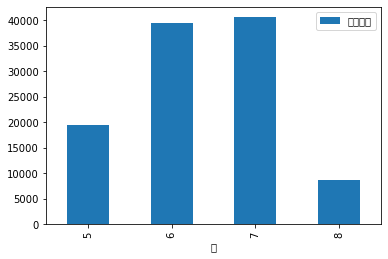

In [12]:
pd.pivot_table(data=df1, index='월', values='출고수량', aggfunc='sum').plot(kind='bar')

In [13]:
df2 = pd.read_csv('Data02.csv')
print(df2.shape)
df2.head()

(46749, 9)


,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231


In [23]:
def date_function(x):
    return x[0:10]

df2['배송시작일(datetime)']=pd.to_datetime(df2['배송시작일'].apply(date_function))
df2['배송완료일(datetime)']=pd.to_datetime(df2['배송완료일'].apply(date_function))

In [26]:
df2['배송시간']=df2['배송완료일(datetime)']-df2['배송시작일(datetime)'] #data-type=timedelta 시간 간격을 나타냄

In [28]:
df2['배송시간'].describe()

count                        46749
mean     4 days 04:38:57.008278251
std      1 days 04:56:12.144368428
min                0 days 00:00:00
25%                4 days 00:00:00
50%                4 days 00:00:00
75%                4 days 00:00:00
max               47 days 00:00:00
Name: 배송시간, dtype: object

In [34]:
def date_function2(x):
    result = str(x)
    return result[0:4]+'-'+result[4:6]+'-'+result[6:8]

df2['주문일(datetime)'] = pd.to_datetime(df2['주문일'].apply(date_function2))
df2

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,배송시작일(datetime),배송완료일(datetime),배송시간,주문일(datetime)
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2019-01-07,2019-01-11,4 days,2018-12-27
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2019-01-03,2019-01-07,4 days,2018-12-29
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230,2019-01-03,2019-01-07,4 days,2018-12-30
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231,2019-01-03,2019-01-07,4 days,2018-12-31
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231,2019-01-07,2019-01-11,4 days,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229,2017-12-29,2018-01-02,4 days,2017-12-29
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229,2018-01-03,2018-01-07,4 days,2017-12-29
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230,2018-01-02,2018-01-11,9 days,2017-12-30
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231,2018-01-03,2018-01-06,3 days,2017-12-31
